# Lab 4-2: Load Data

## Data in Real World

지금까지는 하나 혹은 적은 양의 데이터를 가지고 예측하는 과정을 진행했다.  
그러나 현실에서는 제대로 된 예측을 하기 위해서는 많은 양의 데이터를 통해 예측하는 것이 대부분이다.  

즉, 복잡한 머신러닝 모델을 학습하려면 엄청난 양의 데이터가 필요하다.  
인터넷에 공개된 데이터셋들을 봐도 대부분이 적어도 수십만 개의 데이터를 제공한다.

## Data in the Real World: Problem

하지만 실제로 제공되거나 만든 데이터셋을 사용하는 경우 또다른 문제가 발생한다.

- 엄청난 양의 데이터를 한 번에 학습시킬 수 없다.
  - 너무 느리다.
  - 하드웨어적으로 불가능하다.
- 그렇다면 일부분의 데이터로만 학습하면 어떨까?  

## Minibatch Gradient Descent

전체 데이터를 균일하게 나눠서 학습하자!

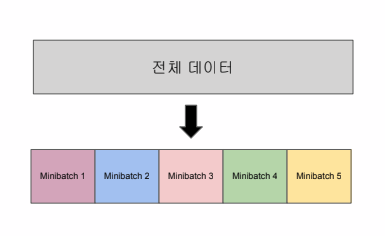

## Minibatch Gradient Descent: Effects

- 업데이트를 좀 더 빠르게 할 수 있다.
- 전체 데이터를 쓰지 않아서 잘못된 방향으로 업데이트 할 수도 있다.

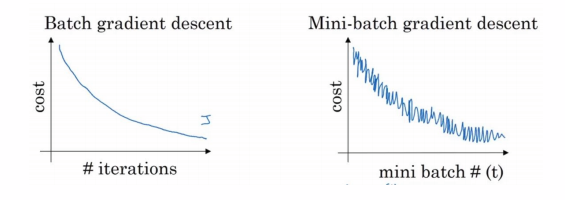

In [1]:
from torch.utils.data import Dataset    # torch.utils.data.Dataset 상속

In [3]:
class CustomDataset(Dataset):
    def __init__(self):
        self.x_data = [[ 73,  80,  75],
                       [ 93,  88,  93],
                       [ 89,  91,  90],
                       [ 96,  98, 100],
                       [ 73,  66,  70]]
        self.y_data = [[152], [185], [180], [196], [142]]
        
    def __len__(self):
        """이 데이터셋의 총 데이터 수
        """
        return len(self.x_data)
    
    def __getitem__(self, idx):
        """어떠한 인덱스 idx를 받았을 때,
           그에 상응하는 입출력 데이터 반환
        """
        x = torch.FloatTensor(self.x_data[idx])
        y = torch.FloatTensor(self.y_data[idx])
        
        return x, y

In [4]:
dataset = CustomDataset()

In [5]:
from torch.utils.data import DataLoader    # torch.utils.data.DataLoader 사용

In [6]:
dataloader = DataLoader(
    dataset,
    batch_size=2,
    shuffle=True,
)

`batch_size = 2`
  - 각 minibatch의 크기
  - 통상적으로 2의 제곱수로 설정한다.(16, 32, 64, 128, 256, 512...)

`shuffle = True`
  - Epoch 마다 데이터셋을 섞어서, 데이터가 학습되는 순서를 바꾼다.

In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [8]:
# For reproducibility
torch.manual_seed(1)

In [9]:
class MultivariateLinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(3, 1)

    def forward(self, x):
        return self.linear(x)

In [13]:
# 모델 초기화
model = MultivariateLinearRegressionModel()
# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=1e-5)

nb_epochs = 20
for epoch in range(nb_epochs + 1):
    for batch_idx, samples in enumerate(dataloader):
        x_train, y_train = samples
        
        # H(x) 계산
        prediction = model(x_train)
    
        # cost 계산
        cost = F.mse_loss(prediction, y_train)
    
        # cost로 H(x) 개선
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
    
        # 20번마다 로그 출력
        print(f'Epoch {epoch:4d}/{nb_epochs} \
            Batch {batch_idx+1}/{len(dataloader)} \
            Cost: {cost.item():.6f}')

Epoch    0/20             Batch 1/3             Cost: 47617.179688
Epoch    0/20             Batch 2/3             Cost: 19737.009766
Epoch    0/20             Batch 3/3             Cost: 6020.775879
Epoch    1/20             Batch 1/3             Cost: 1336.622803
Epoch    1/20             Batch 2/3             Cost: 664.452698
Epoch    1/20             Batch 3/3             Cost: 95.306343
Epoch    2/20             Batch 1/3             Cost: 47.680702
Epoch    2/20             Batch 2/3             Cost: 16.383287
Epoch    2/20             Batch 3/3             Cost: 10.639208
Epoch    3/20             Batch 1/3             Cost: 0.048456
Epoch    3/20             Batch 2/3             Cost: 3.750019
Epoch    3/20             Batch 3/3             Cost: 0.005905
Epoch    4/20             Batch 1/3             Cost: 1.368384
Epoch    4/20             Batch 2/3             Cost: 1.069586
Epoch    4/20             Batch 3/3             Cost: 0.009247
Epoch    5/20             Batch 1/3

## Slicing 1D Array

In [2]:
nums = [0, 1, 2, 3, 4]

In [3]:
print(nums)

[0, 1, 2, 3, 4]


index 2에서 4 전까지 가져와라. (앞 포함, 뒤 비포함)

In [4]:
print(nums[2:4])

[2, 3]


index 2부터 다 가져와라.

In [5]:
print(nums[2:])

[2, 3, 4]


index 2 전까지 가져와라. (역시 뒤는 비포함)

In [6]:
print(nums[:2])

[0, 1]


전부 가져와라

In [7]:
print(nums[:])

[0, 1, 2, 3, 4]


마지막 index 전까지 가져와라. (뒤는 비포함!)

In [8]:
print(nums[:-1])

[0, 1, 2, 3]


assign 도 가능!

In [9]:
nums[2:4] = [8, 9]

In [10]:
print(nums)

[0, 1, 8, 9, 4]


## Slicing 2D Array

In [11]:
import numpy as np

In [12]:
b = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])

In [13]:
print(b)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


In [14]:
b[:, 1]

array([ 2,  6, 10])

In [15]:
b[-1]

array([ 9, 10, 11, 12])

In [16]:
b[-1, :]

array([ 9, 10, 11, 12])

In [17]:
b[-1, ...]

array([ 9, 10, 11, 12])

In [18]:
b[0:2, :]

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

## Loading Data from `.csv` file

In [19]:
import numpy as np

In [20]:
xy = np.loadtxt('data-01-test-score.csv', delimiter=',', dtype=np.float32)

In [21]:
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

In [22]:
print(x_data.shape) # x_data shape
print(len(x_data))  # x_data 길이
print(x_data[:5])   # 첫 다섯 개

(25, 3)
25
[[ 73.  80.  75.]
 [ 93.  88.  93.]
 [ 89.  91.  90.]
 [ 96.  98. 100.]
 [ 73.  66.  70.]]


In [23]:
print(y_data.shape) # y_data shape
print(len(y_data))  # y_data 길이
print(y_data[:5])   # 첫 다섯 개

(25, 1)
25
[[152.]
 [185.]
 [180.]
 [196.]
 [142.]]


## Imports

In [24]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [25]:
# For reproducibility
torch.manual_seed(1)

## Low-level Implementation

In [27]:
# 데이터
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)
# 모델 초기화
W = torch.zeros((3, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W, b], lr=1e-5)

nb_epochs = 20
for epoch in range(nb_epochs + 1):
    
    # H(x) 계산
    hypothesis = x_train.matmul(W) + b # or .mm or @

    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    print('Epoch {:4d}/{} Cost: {:.6f}'.format(
        epoch, nb_epochs, cost.item()
    ))

Epoch    0/20 Cost: 26811.960938
Epoch    1/20 Cost: 9920.529297
Epoch    2/20 Cost: 3675.299072
Epoch    3/20 Cost: 1366.261108
Epoch    4/20 Cost: 512.542236
Epoch    5/20 Cost: 196.896484
Epoch    6/20 Cost: 80.190910
Epoch    7/20 Cost: 37.038647
Epoch    8/20 Cost: 21.081354
Epoch    9/20 Cost: 15.178741
Epoch   10/20 Cost: 12.993667
Epoch   11/20 Cost: 12.183028
Epoch   12/20 Cost: 11.880545
Epoch   13/20 Cost: 11.765955
Epoch   14/20 Cost: 11.720857
Epoch   15/20 Cost: 11.701424
Epoch   16/20 Cost: 11.691505
Epoch   17/20 Cost: 11.685121
Epoch   18/20 Cost: 11.680006
Epoch   19/20 Cost: 11.675381
Epoch   20/20 Cost: 11.670943


## High-level Implementation with `nn.Module`

In [29]:
class MultivariateLinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(3, 1)

    def forward(self, x):
        return self.linear(x)

In [33]:
# 데이터
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)
# 모델 초기화
model = MultivariateLinearRegressionModel()
# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=1e-5)

nb_epochs = 20
for epoch in range(nb_epochs+1):
    
    # H(x) 계산
    prediction = model(x_train)
    
    # cost 계산
    cost = F.mse_loss(prediction, y_train)
    
    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    # 20번마다 로그 출력
    print('Epoch {:4d}/{} Cost: {:.6f}'.format(
        epoch, nb_epochs, cost.item()
    ))

Epoch    0/20 Cost: 28388.000000
Epoch    1/20 Cost: 10504.286133
Epoch    2/20 Cost: 3892.179688
Epoch    3/20 Cost: 1447.497314
Epoch    4/20 Cost: 543.628357
Epoch    5/20 Cost: 209.440048
Epoch    6/20 Cost: 85.878799
Epoch    7/20 Cost: 40.191814
Epoch    8/20 Cost: 23.297268
Epoch    9/20 Cost: 17.048059
Epoch   10/20 Cost: 14.734761
Epoch   11/20 Cost: 13.876624
Epoch   12/20 Cost: 13.556563
Epoch   13/20 Cost: 13.435411
Epoch   14/20 Cost: 13.387821
Epoch   15/20 Cost: 13.367404
Epoch   16/20 Cost: 13.357059
Epoch   17/20 Cost: 13.350419
Epoch   18/20 Cost: 13.345175
Epoch   19/20 Cost: 13.340427
Epoch   20/20 Cost: 13.335882


## Dataset and DataLoader

<div class="alert alert-warning">
    pandas 기초지식이 필요할 것 같다
</div>

너무 데이터가 크면 `x_data`, `y_data` 를 전부 다 가져오지 말고, 필요한 배치만 가져올 수 밖에 없다.

[PyTorch Data Loading and Processing tutorial](https://pytorch.org/tutorials/beginner/data_loading_tutorial.html#iterating-through-the-dataset)